Sprial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.graph_objects as go
import os
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from sklearn.model_selection import train_test_split

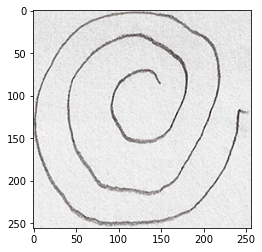

In [4]:
img_healthy = cv2.imread('full/V01HE03.png')
plt.imshow(img_healthy)

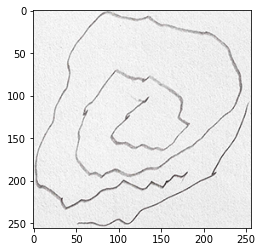

In [6]:
img_patient = cv2.imread('full/V07PE03.png')
plt.imshow(img_patient)

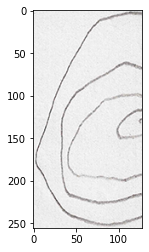

In [87]:
plt.imshow(img_healthy[:,0:128,:])

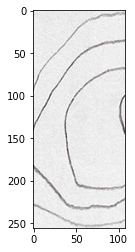

In [88]:
plt.imshow(img_patient[:,20:128,:])

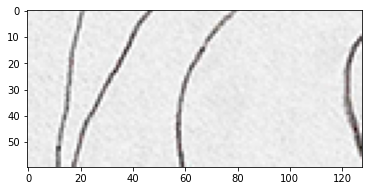

In [89]:
plt.imshow(img_patient[90:150,:128,:])

In [90]:
img_patient[90:150,128,0]

array([231, 236, 233, 233, 241, 240, 245, 255, 206,  80, 124, 233, 255,
       239, 230, 237, 230, 236, 235, 231, 235, 244, 235, 225, 234, 241,
       240, 236, 237, 238, 233, 233, 235, 239, 236, 234, 239, 237, 227,
       235, 239, 227, 227, 230, 220, 234, 242, 251, 255, 255, 236, 227,
       187, 146,  43,  75, 172, 206, 244, 255], dtype=uint8)

0.15025592


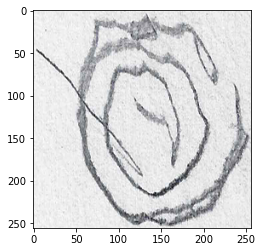

In [34]:
img_patient2=plt.imread("full/V04PE02.png")
plt.imshow(img_patient2)
print(img_patient2.std())

0.099725015

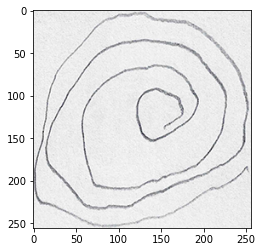

In [35]:
plt.imshow(img_patient)
img_patient.std()

0.084364556

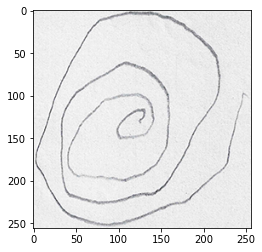

In [36]:
plt.imshow(img_healthy)
img_healthy.std()

## check the correlation of std of matrix with healthy/unhealthy

## check the correlation of number of point with healthy/unhealthy

In [37]:
from pathlib import Path
import pandas as pd
data_dir = Path(r'/Users/apple/Desktop/SAPintern/archive/spiral/')
draw_df = pd.DataFrame({'path': list(data_dir.glob('*/*/*.png'))})
draw_df['img_id'] = draw_df['path'].map(lambda x: x.stem)
draw_df['disease'] = draw_df['path'].map(lambda x: x.parent.stem)
draw_df['validation'] = draw_df['path'].map(lambda x: x.parent.parent.stem)
draw_df.sample(5)

,path,img_id,disease,validation
82,/Users/apple/Desktop/SAPintern/archive/spiral/...,V07HE01,healthy,testing
12,/Users/apple/Desktop/SAPintern/archive/spiral/...,V11HE03,healthy,training
38,/Users/apple/Desktop/SAPintern/archive/spiral/...,V09PE02,parkinson,training
2,/Users/apple/Desktop/SAPintern/archive/spiral/...,V55HE07,healthy,training
88,/Users/apple/Desktop/SAPintern/archive/spiral/...,V09PE01,parkinson,testing


### feature 1: hists on x-axis and y_asix

In [38]:
draw_df["corr"] = np.nan
draw_df["chi"] = np.nan
draw_df["inter"] = np.nan
draw_df["bar"] = np.nan
draw_df["hell"] = np.nan
draw_df["chi_alt"] = np.nan

In [39]:
corr_list=[]
inter_list=[]
bar_list=[]
chi_list=[]

for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    G_X = cv2.reduce(thresh, 0 ,cv2.REDUCE_SUM,dtype=cv2.CV_32F) #32F或者两个都改都可以
    G_Y = cv2.reduce(thresh, 1 ,cv2.REDUCE_SUM,dtype=cv2.CV_32F)
    hist1=cv2.calcHist([G_X],[0],None,[65536],[0,65535])
    hist2=cv2.calcHist([G_Y],[0],None,[65536],[0,65535])
    #temp_corr_list.append(cv2.compareHist(hist1,hist2,0))
    #temp_chi_list.append(cv2.compareHist(hist1,hist2,1))
    #temp_inter_list.append(cv2.compareHist(hist1,hist2,2))
    #temp_bar_list.append(cv2.compareHist(hist1,hist2,3))
    draw_df.iloc[j,4]=cv2.compareHist(hist1,hist2,0)
    draw_df.iloc[j,5]=cv2.compareHist(hist1,hist2,1)
    draw_df.iloc[j,6]=cv2.compareHist(hist1,hist2,2)
    draw_df.iloc[j,7]=cv2.compareHist(hist1,hist2,3)
    draw_df.iloc[j,8]=cv2.compareHist(hist1,hist2,4)
    draw_df.iloc[j,9]=cv2.compareHist(hist1,hist2,5)
    #draw_df.iloc[j,10]=cv2.compareHist(hist1,hist2,6)
    #corr_list.append(temp_corr_list)
    #inter_list.append(temp_inter_list)
    #bar_list.append(temp_bar_list)
    #chi_list.append(temp_chi_list)

### feature 2

In [40]:
draw_df["mean"] = np.nan
draw_df["median"] = np.nan
draw_df["range"] = np.nan
draw_df["std"] = np.nan
draw_df["skew"] = np.nan
draw_df["kur"] = np.nan

In [41]:
from scipy.stats import skew,kurtosis
healthy=None
parkinson=None
counter=1
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    sum_bycolumn=np.sum(median, axis=1) # sum by column
    sum_byrow=np.sum(median, axis=0) # sum by row
    #print(sum_bycolumn.shape)
    #print(sum_byrow.shape)
    series=np.hstack((sum_byrow,sum_bycolumn))
    series=series.reshape((1,-1))
   # print(series[0].shape)
    draw_df.iloc[j,10]=np.mean(series[0])
    draw_df.iloc[j,11]=np.median(series[0])
    draw_df.iloc[j,12]=np.ptp(series[0])
    draw_df.iloc[j,13]=np.std(series[0])
    draw_df.iloc[j,14]=skew(series[0])
    draw_df.iloc[j,15]=kurtosis(series[0])
    
    if draw_df.iloc[j,2] =='healthy':
        if healthy is None:
            healthy=series[0]
        else:
            healthy=np.hstack((healthy,series[0]))
    else:
        if parkinson is None:
            parkinson=series[0]
        else:
            parkinson=np.hstack((healthy,series[0]))
   # print(counter)
    counter+=1
healthy=healthy.reshape((1,-1))
parkinson=parkinson.reshape((1,-1))

### feature 3

In [42]:
draw_df["h_dis"] = np.nan
draw_df["v_dis"] = np.nan
draw_df["asym"] = np.nan

In [43]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    M = cv2.moments(median)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    left_x=np.amin(np.argwhere(median>0),axis=0)[0] # leftmost x
    right_x=np.amax(np.argwhere(median>0),axis=0)[0] # rightmost x
    up_y=np.amin(np.argwhere(median>0),axis=0)[1] # up y
    btm_y=np.amax(np.argwhere(median>0),axis=0)[1] # bottom y
    
    draw_df.iloc[j,16]=abs((cY-up_y)-(btm_y-cY))/(btm_y-up_y)
    draw_df.iloc[j,17]=abs((cX-left_x)-(right_x-cX))/(right_x-left_x)
    draw_df.iloc[j,18]=draw_df.iloc[j,16]+draw_df.iloc[j,17]

In [44]:
draw_df.columns

Index(['path', 'img_id', 'disease', 'validation', 'corr', 'chi', 'inter',
       'bar', 'hell', 'chi_alt', 'mean', 'median', 'range', 'std', 'skew',
       'kur', 'h_dis', 'v_dis', 'asym'],
      dtype='object')

### feature 4: brightness and color difference of image

In [45]:
draw_df["brightness"] = np.nan
draw_df["color_diff"] = np.nan

In [46]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]))
    draw_df.iloc[j,19]=img.mean()
    draw_df.iloc[j,20]=img.std()

<Figure size 432x288 with 0 Axes>

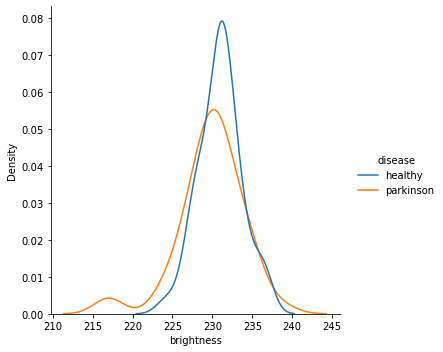

<Figure size 432x288 with 0 Axes>

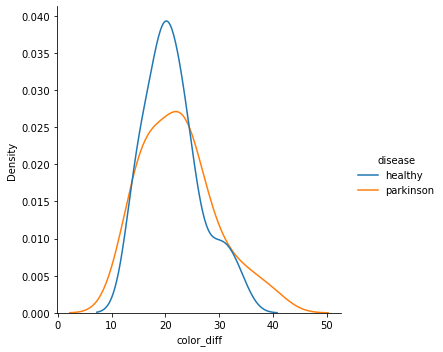

In [47]:
for i in ["brightness",'color_diff']:
    plt.clf()
    sns.displot(draw_df, x=i, hue="disease",kind="kde")
    plt.show()

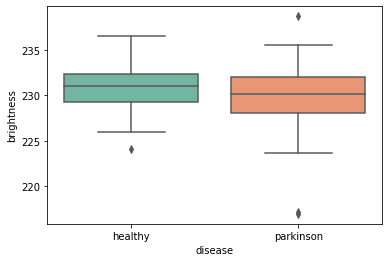

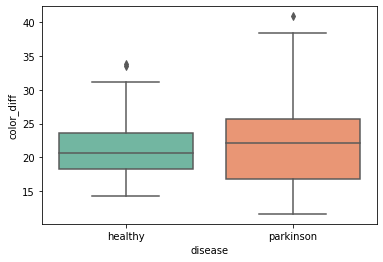

In [48]:
for i in ["brightness",'color_diff']:
    plt.clf()
    sns.boxplot(x='disease', y=i,data=draw_df, palette="Set2")
    plt.show()

#### summary:
Parkinson sprial has lower brightness and  larger color difference compared to healthy ones.

### feature 5: number of circles in sprial

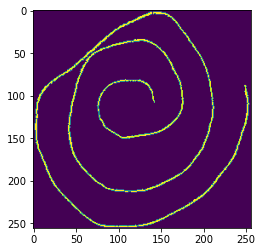

In [49]:
img=cv2.imread(str(draw_df.iloc[0,0]),cv2.IMREAD_GRAYSCALE)
ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
median=cv2.medianBlur(thresh,3)
plt.imshow(thresh)

array([  0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

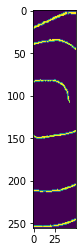

In [50]:
plt.imshow(thresh[:,100:150])
thresh[:,150]

In [51]:
median[:,150]

array([  0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [52]:
#input: 1d array with length=256
#output: number of lines
def count_points(matrix):
    count=0
    for i in range(len(matrix)):
        pixel = matrix[i]
        if i==0 and pixel>0: #the first pixel
            count+=1
        elif pixel>0 and matrix[i-1]==0:
            count+=1
    return count

In [53]:
range(median.shape[0])

range(0, 256)

In [54]:
#input: binary image
#output: horizontal nonzero points, vertical nonzero points
def count_line_cutpoint(img):
    horizon =[0]*img.shape[0]
    vertical =[0]*img.shape[1]
    for i in range(img.shape[0]):
        horizon[i]=count_points(img[i,:])
    for j in range(img.shape[1]):
        vertical[j]=count_points(img[:,j])
    return horizon,vertical

In [55]:
draw_df["num_circles"] = np.nan
draw_df["cutpoints_mean"] = np.nan
draw_df["cutpoints_std"] = np.nan

In [56]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    
    h_ma, v_ma = count_line_cutpoint(median)
    ma=np.hstack((h_ma, v_ma))
    draw_df.iloc[j,21]=max(max(h_ma),max(v_ma))//2 #num_of_circles
    draw_df.iloc[j,22]=ma.mean()
    draw_df.iloc[j,23]=ma.std()

<Figure size 432x288 with 0 Axes>

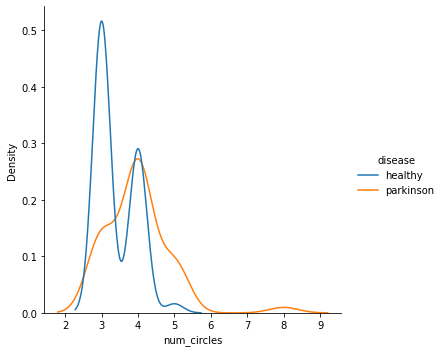

<Figure size 432x288 with 0 Axes>

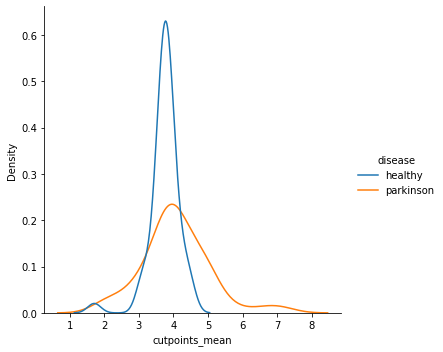

<Figure size 432x288 with 0 Axes>

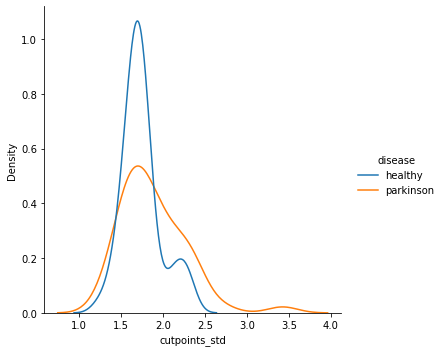

In [57]:
for i in ["num_circles","cutpoints_mean","cutpoints_std"]:
    plt.clf()
    sns.displot(draw_df, x=i, hue="disease",kind="kde")
    plt.show()

In [58]:
#healthy
print(draw_df[draw_df['disease']=='healthy']['num_circles'].mean())
print(draw_df[draw_df['disease']=='healthy']['num_circles'].median())

3.392156862745098
3.0


In [59]:
#parkinson
print(draw_df[draw_df['disease']=='parkinson']['num_circles'].mean())
print(draw_df[draw_df['disease']=='parkinson']['num_circles'].median())

3.980392156862745
4.0


### feature 6: thickness of the line
https://stackoverflow.com/questions/50967808/find-the-thickness-of-the-sealant-line-using-opencv
https://docs.opencv.org/4.4.0/df/d6c/ximgproc_8hpp.html

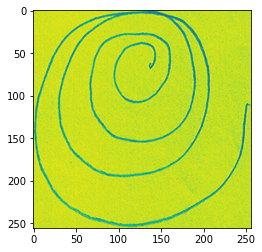

In [60]:
img= cv2.imread('full/V04HE03.png',cv2.IMREAD_GRAYSCALE)
ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
plt.imshow(img)

In [61]:
def skeletonize_line(matrix):
    l = len(matrix)
    m=matrix.copy()
    for i in range(l):
        if i<(l-1) and m[i]>0 and m[i+1]>0: #exclude the last pixel on this vertical line
            m[i]=0
        else:
            continue
    if m.sum()!=0:
        width = matrix.sum()/(m.sum())
    else:
        width = 0
    return m,width

In [62]:
def skeletonize_img_vertical(img):
    img2=img.copy()
    width_list = [0]*img.shape[1]
    for j in range(img.shape[1]):
        img2[:,j],width_list[j]=skeletonize_line(img2[:,j])
    width = [i for i in width_list if i != 0]
    return img2,width

In [63]:
def skeletonize_img_horizontal(img):
    img2=img.copy()
    width_list = [0]*img.shape[0]
    for i in range(img.shape[0]):
        img2[i,:],width_list[i]=skeletonize_line(img2[i,:])
    width = [i for i in width_list if i != 0]
    return img2,width

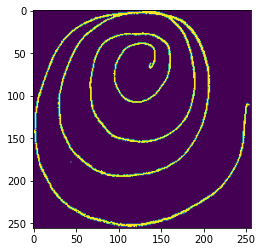

In [64]:
plt.imshow(thresh)

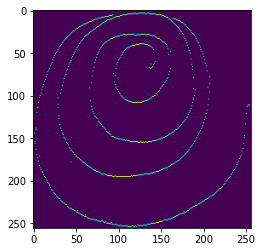

In [65]:
sv, width = skeletonize_img_vertical(thresh)
plt.imshow(sv)

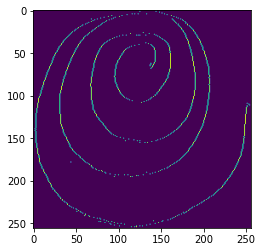

In [66]:
sh, width = skeletonize_img_horizontal(thresh)
plt.imshow(sh)

In [67]:
thresh.sum()/sv.sum()

4.1128584643848285

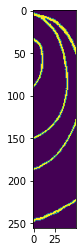

In [68]:
plt.imshow(thresh[:,150:200])

In [69]:
thresh[:,200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
       255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
       255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [70]:
skeletonize_line(thresh[:,200])

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [71]:
draw_df["line_thickness"] = np.nan
draw_df["line_difference"] = np.nan

In [72]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    
    skeleton_v, width_v = skeletonize_img_vertical(thresh)
    skeleton_h, width_h = skeletonize_img_horizontal(thresh)
    thickness = (thresh.sum()/skeleton_v.sum()+thresh.sum()/skeleton_h.sum())/2
    uniformity = np.array(width_v+width_h).std()

    draw_df.iloc[j,24]= thickness #mean thickness of line
    draw_df.iloc[j,25]= uniformity#uniformity of line

<Figure size 432x288 with 0 Axes>

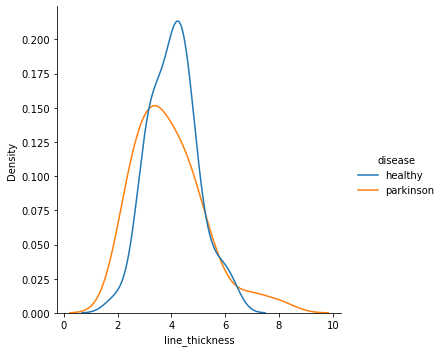

<Figure size 432x288 with 0 Axes>

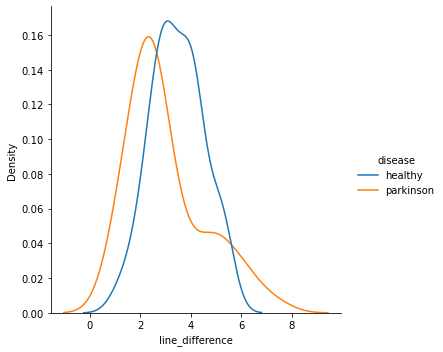

In [73]:
for i in ["line_thickness","line_difference"]:
    plt.clf()
    sns.displot(draw_df, x=i, hue="disease",kind="kde")
    plt.show()

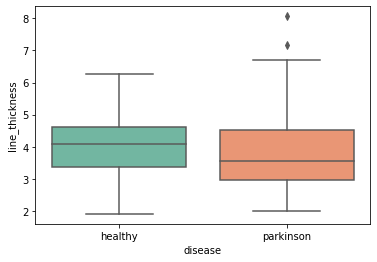

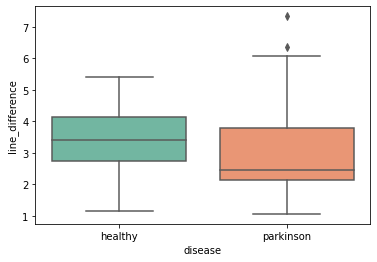

In [74]:
for i in ["line_thickness","line_difference"]:
    plt.clf()
    sns.boxplot(x='disease', y=i,data=draw_df, palette="Set2")
    plt.show()

In [75]:
draw_df[draw_df.line_thickness==draw_df['line_thickness'].max()]

,path,img_id,disease,validation,corr,chi,inter,bar,hell,chi_alt,...,h_dis,v_dis,asym,brightness,color_diff,num_circles,cutpoints_mean,cutpoints_std,line_thickness,line_difference
66,/Users/apple/Desktop/SAPintern/archive/spiral/...,V04PE02,parkinson,training,0.443364,395.511386,119.0,0.553729,400.915229,1296.10406,...,0.024,0.106719,0.130719,216.90215,38.315262,5.0,4.507812,2.30826,8.064179,7.342154


In [76]:
draw_df[draw_df.line_thickness==draw_df['line_thickness'].min()]

,path,img_id,disease,validation,corr,chi,inter,bar,hell,chi_alt,...,h_dis,v_dis,asym,brightness,color_diff,num_circles,cutpoints_mean,cutpoints_std,line_thickness,line_difference
81,/Users/apple/Desktop/SAPintern/archive/spiral/...,V02HE01,healthy,testing,0.958763,39.386286,212.0,0.215546,65.163031,184.54925,...,0.102041,0.090164,0.192205,236.624232,14.857599,5.0,1.710938,1.250952,1.906714,1.158082


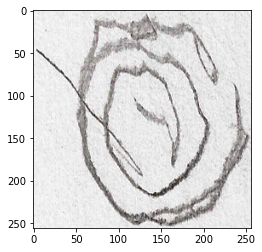

In [77]:
# the plot with thickiest line
img_thick=cv2.imread('full/V04PE02.png')
plt.imshow(img_thick)

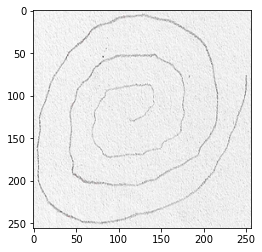

In [78]:
# the plot with thinnest line
img_thin=cv2.imread('full/V02HE01.png')
plt.imshow(img_thin)

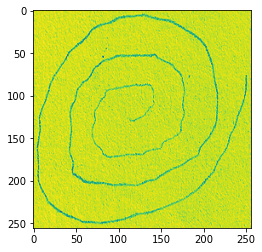

In [81]:
plt.imshow(img)

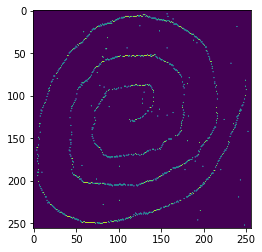

In [80]:
img=cv2.imread('full/V02HE01.png',cv2.IMREAD_GRAYSCALE)
ret,img_thick=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
plt.imshow(skeletonize_img_vertical(img_thick)[0])

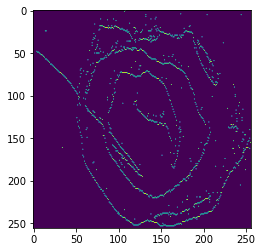

In [82]:
img=cv2.imread('full/V04PE02.png',cv2.IMREAD_GRAYSCALE)
ret,img_thick=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
plt.imshow(skeletonize_img_vertical(img_thick)[0])

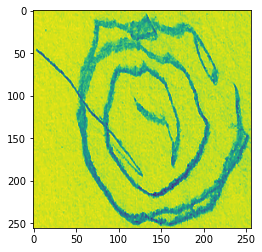

In [83]:
plt.imshow(img)